In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
telco_data = pd.read_csv("Telco_Customer_Churn.csv")

# Display the first few rows and general info of the dataset
telco_data.head(), telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

**Some data cleaning for missing values**

In [6]:
# Convert 'TotalCharges' to numeric, coercing errors to identify anomalies
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

# Check for missing values
missing_values = telco_data.isnull().sum()

# Display rows with missing 'TotalCharges'
missing_total_charges = telco_data[telco_data['TotalCharges'].isnull()]

# Summary of missing values
missing_values, missing_total_charges


(customerID           0
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                0
 dtype: int64,
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
 488   4472-LVYGI  Female              0     Yes        Yes       0   
 753   3115-CZMZD    Male              0      No        Yes       0   
 936   5709-LVOEQ  Female              0     Yes        Yes       0   
 1082  4367-NUYAO    Male              0     Yes        Yes       0   
 1340  1371-DWPAZ  Female              0     Yes        Yes       0   
 3331  7644-OMVMY    Male              0     Yes       

The TotalCharges column has 11 missing values, which were caused by rows where tenure is 0. These customers likely did not complete a full billing cycle, resulting in TotalCharges being unavailable.

In [7]:
# Replace missing TotalCharges with 0
telco_data['TotalCharges'].fillna(0, inplace=True)

# Confirm there are no missing values
missing_values_after_imputation = telco_data.isnull().sum()

missing_values_after_imputation


C:\Users\parth\AppData\Local\Temp\ipykernel_9388\117618189.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telco_data['TotalCharges'].fillna(0, inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Descriptive Stats**

In [8]:
# Descriptive statistics for numeric columns
numeric_stats = telco_data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

# Frequency counts for categorical columns
categorical_stats = telco_data.select_dtypes(include='object').nunique()

numeric_stats, categorical_stats


(            tenure  MonthlyCharges  TotalCharges
 count  7043.000000     7043.000000   7043.000000
 mean     32.371149       64.761692   2279.734304
 std      24.559481       30.090047   2266.794470
 min       0.000000       18.250000      0.000000
 25%       9.000000       35.500000    398.550000
 50%      29.000000       70.350000   1394.550000
 75%      55.000000       89.850000   3786.600000
 max      72.000000      118.750000   8684.800000,
 customerID          7043
 gender                 2
 Partner                2
 Dependents             2
 PhoneService           2
 MultipleLines          3
 InternetService        3
 OnlineSecurity         3
 OnlineBackup           3
 DeviceProtection       3
 TechSupport            3
 StreamingTV            3
 StreamingMovies        3
 Contract               3
 PaperlessBilling       2
 PaymentMethod          4
 Churn                  2
 dtype: int64)

**Churn Analysis**

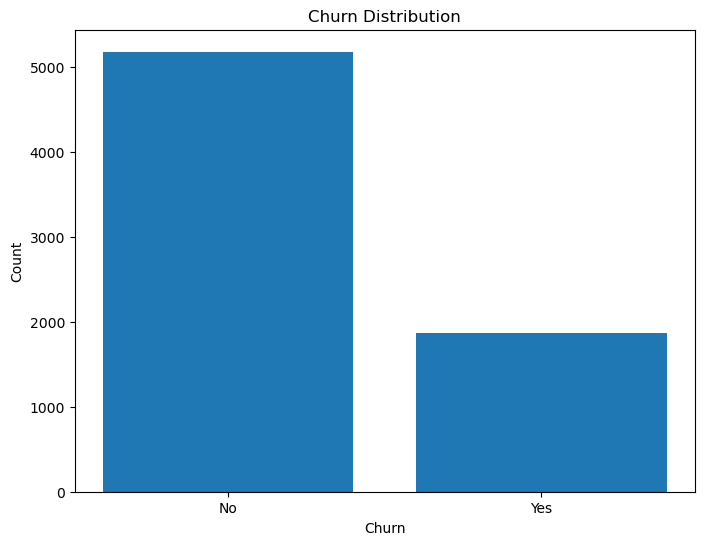

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


In [12]:

# Churn distribution
churn_counts = telco_data['Churn'].value_counts()

# Visualize churn distribution
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks(ticks=range(len(churn_counts)), labels=churn_counts.index)
plt.show()

# Churn rates by Contract type
churn_by_contract = telco_data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Churn rates by PaymentMethod
churn_by_payment = telco_data.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

print(churn_by_contract)
print()
print(churn_by_payment)

**Analyze churn by internet service type.**

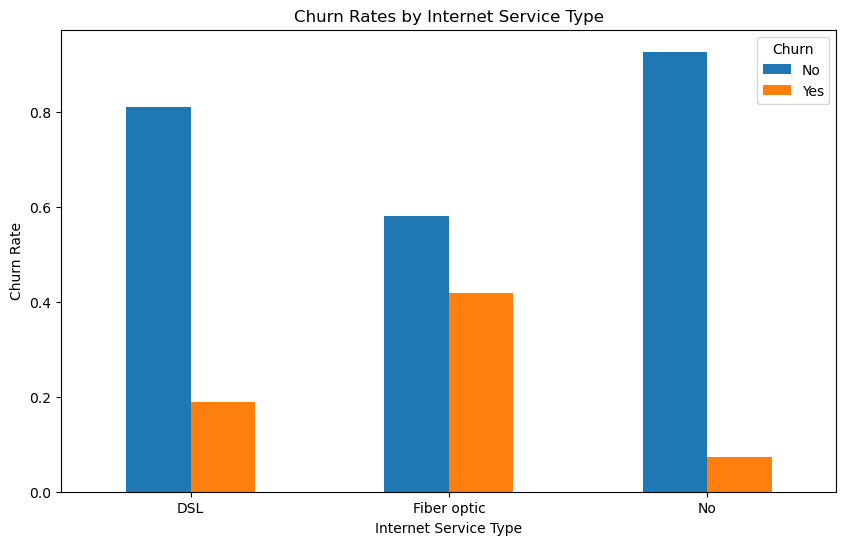

In [13]:
# Churn rates by InternetService type
churn_by_internet_service = telco_data.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()

# Visualize churn by InternetService type
churn_by_internet_service.plot(kind='bar', figsize=(10, 6))
plt.title("Churn Rates by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Churn Rate")
plt.xticks(rotation=0)
plt.legend(title="Churn", loc='upper right')
plt.show()


Fiber Optic Service:

Customers with fiber optic internet have the highest churn rate (~42%). This could indicate dissatisfaction or competition in this service type.
DSL Service:

DSL customers have a lower churn rate (~19%) compared to fiber optic.
No Internet Service:

Customers without internet service have the lowest churn rate (~7%), possibly because they rely on other services like phone or TV and are less likely to leave.

## Model Building

1. Split the dataset into X and y
2. Create xtrain, xtest, ytrain, ytest
3. Perform cross validation on xtrain and ytrain(No hyperparameter tuning)
4. Train the final model on xtrain and ytrain with the hyperparameters of the cross validated model.
5. Test the final model on xtest and ytest.

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Splitting the dataset into features (X) and target (y)
X = telco_data.drop(columns=['customerID', 'Churn'])
y = telco_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create a pipeline for the RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Train the final model on the full training set
pipeline.fit(X_train, y_train)

# Test the final model on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the final model
classification_report_test = classification_report(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)

cv_scores, accuracy_test, classification_report_test


(array([0.80567879, 0.80035492, 0.78793256, 0.78527063, 0.78063943]),
 0.7863733144073811,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86      1035\n           1       0.63      0.49      0.55       374\n\n    accuracy                           0.79      1409\n   macro avg       0.73      0.69      0.70      1409\nweighted avg       0.77      0.79      0.78      1409\n')

**Final Model training**

In [20]:
# Train the final model on the full training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_final = pipeline.predict(X_test)

# Evaluate the final model
final_classification_report = classification_report(y_test, y_pred_final)
final_accuracy = accuracy_score(y_test, y_pred_final)

# Extract feature importance from the trained RandomForestClassifier
final_model = pipeline.named_steps['classifier']
feature_names = (
    list(numerical_cols) +
    list(pipeline.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_cols))
)
feature_importances = final_model.feature_importances_

# Combine feature importance with feature names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


print(final_accuracy,"\n\n", final_classification_report)


0.7863733144073811 

               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

